## Challenge 1 (1 point)
Identify a loud binary black hole signal in white, Gaussian noise.

- Use the data file challenge1.gwf. The channel name is H1:CHALLENGE1.
- The data are white, Gaussian noise containing a simulated BBH signal.
1. Load the data into memory. What are the sampling rate and duration of the data?
2. Plot the data in the time-domain.
3. Plot a spectrogram (or q-transform) of the data, and try to identify the signal.
4. What is the time of the merger?

We load the necessary libraries.

In [ ]:
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries

The respective gravitational wave data is loaded here.

In [8]:
data = TimeSeries.read("challenge1.gwf", channel = "H1:CHALLENGE1")
print(f"Sampling rate of the data: {data.sample_rate}.")
print(f"Duration of the data: {data.duration}.")

Sampling rate of the data: 4096.0 Hz.
Duration of the data: 128.0 s.


We now plot the data in the time domain.

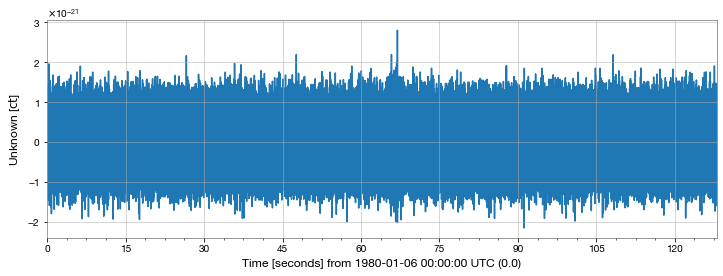

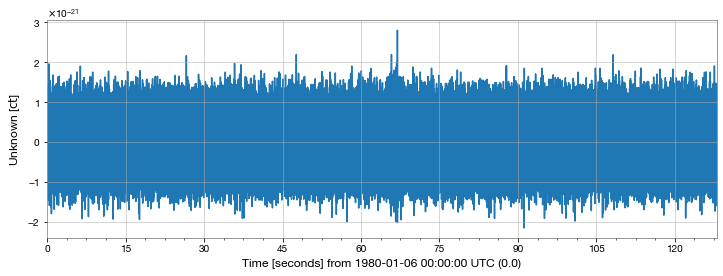

In [15]:
data.plot()

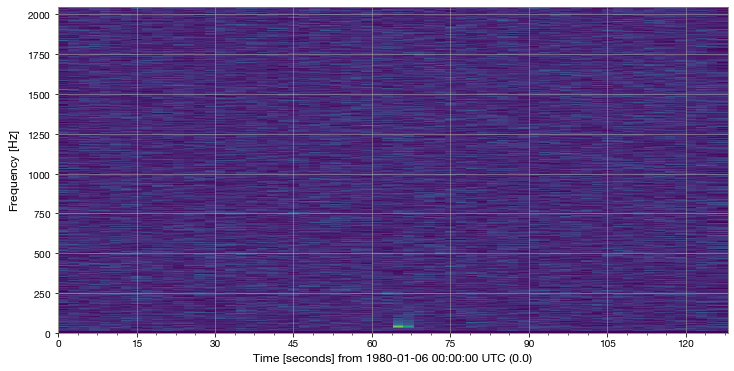

In [12]:
specgram = data.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

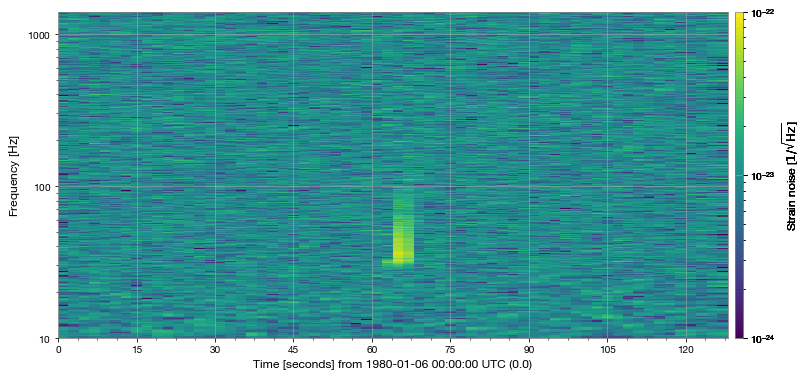

In [21]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-22),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot

In the following block, we obtain a q-transform of the data.

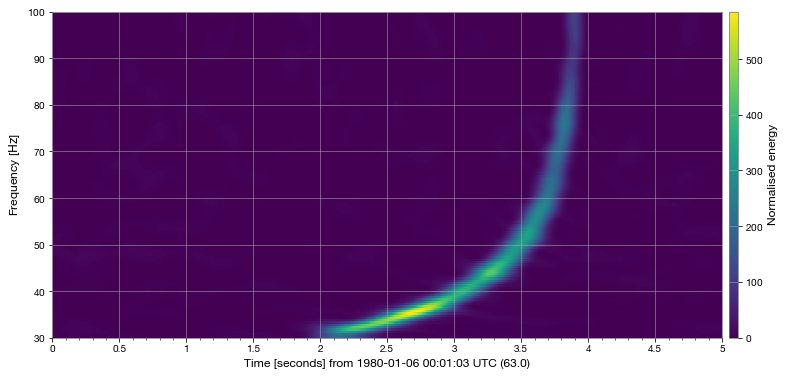

In [27]:
hq = data.q_transform(frange=(30, 100),outseg=(63,68))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

The merger seems to have happened around 3.8 seconds.